In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
dataset = pd.read_csv('forestfires.csv')

# Canadian Forest Fire Weather Index System (FSI)

There are 6 components in the FSI system.

The FFMC, DMC and DC are Fuel moisture codes that measure the moisture content of the forest fuel and dead organix matter. The less the moisture, more are the numbers. 
What this indicates is that the more the dryness on the forest bed, the higher the indices.

ISI is based on the wind speed and FFMC.

# Exploratory Data Analysis (EDA)

In [3]:
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


dataset.info()

As we can see, there are no missing values in this dataset.

In [4]:
dataset.shape

(517, 13)

In [5]:
df = pd.DataFrame(dataset)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


Our Target variable is area. From above, we can see that the range (max - min) is very high and the Standard deviation is also very high. This might mean that the data is skewed.

# Exploratory Data Analysis (EDA)

1. Missing Values

<Axes: >

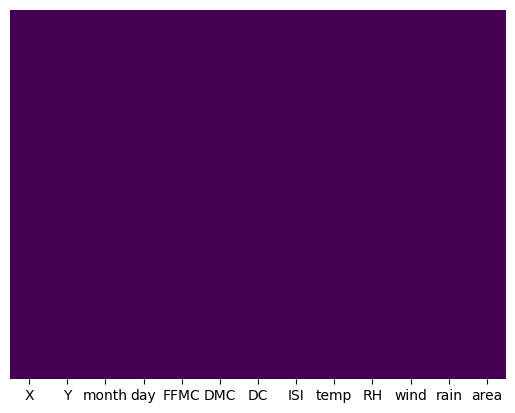

In [7]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

No Missing values are there in the data set as shown in the heat map

Separate the categorical and numerical data.

In [8]:
categorical_data = dataset.select_dtypes(include='object')
numerical_data = dataset.select_dtypes(exclude='object')
numerical_cols = numerical_data.columns.tolist()
categorical_cols = categorical_data.columns.tolist()

2. Univariate Data Analysis


A Univariate statistics explores each variable in a dataset separately. It looks at the central tendancy of the values and range of the values.

Skewness and Kurtosis

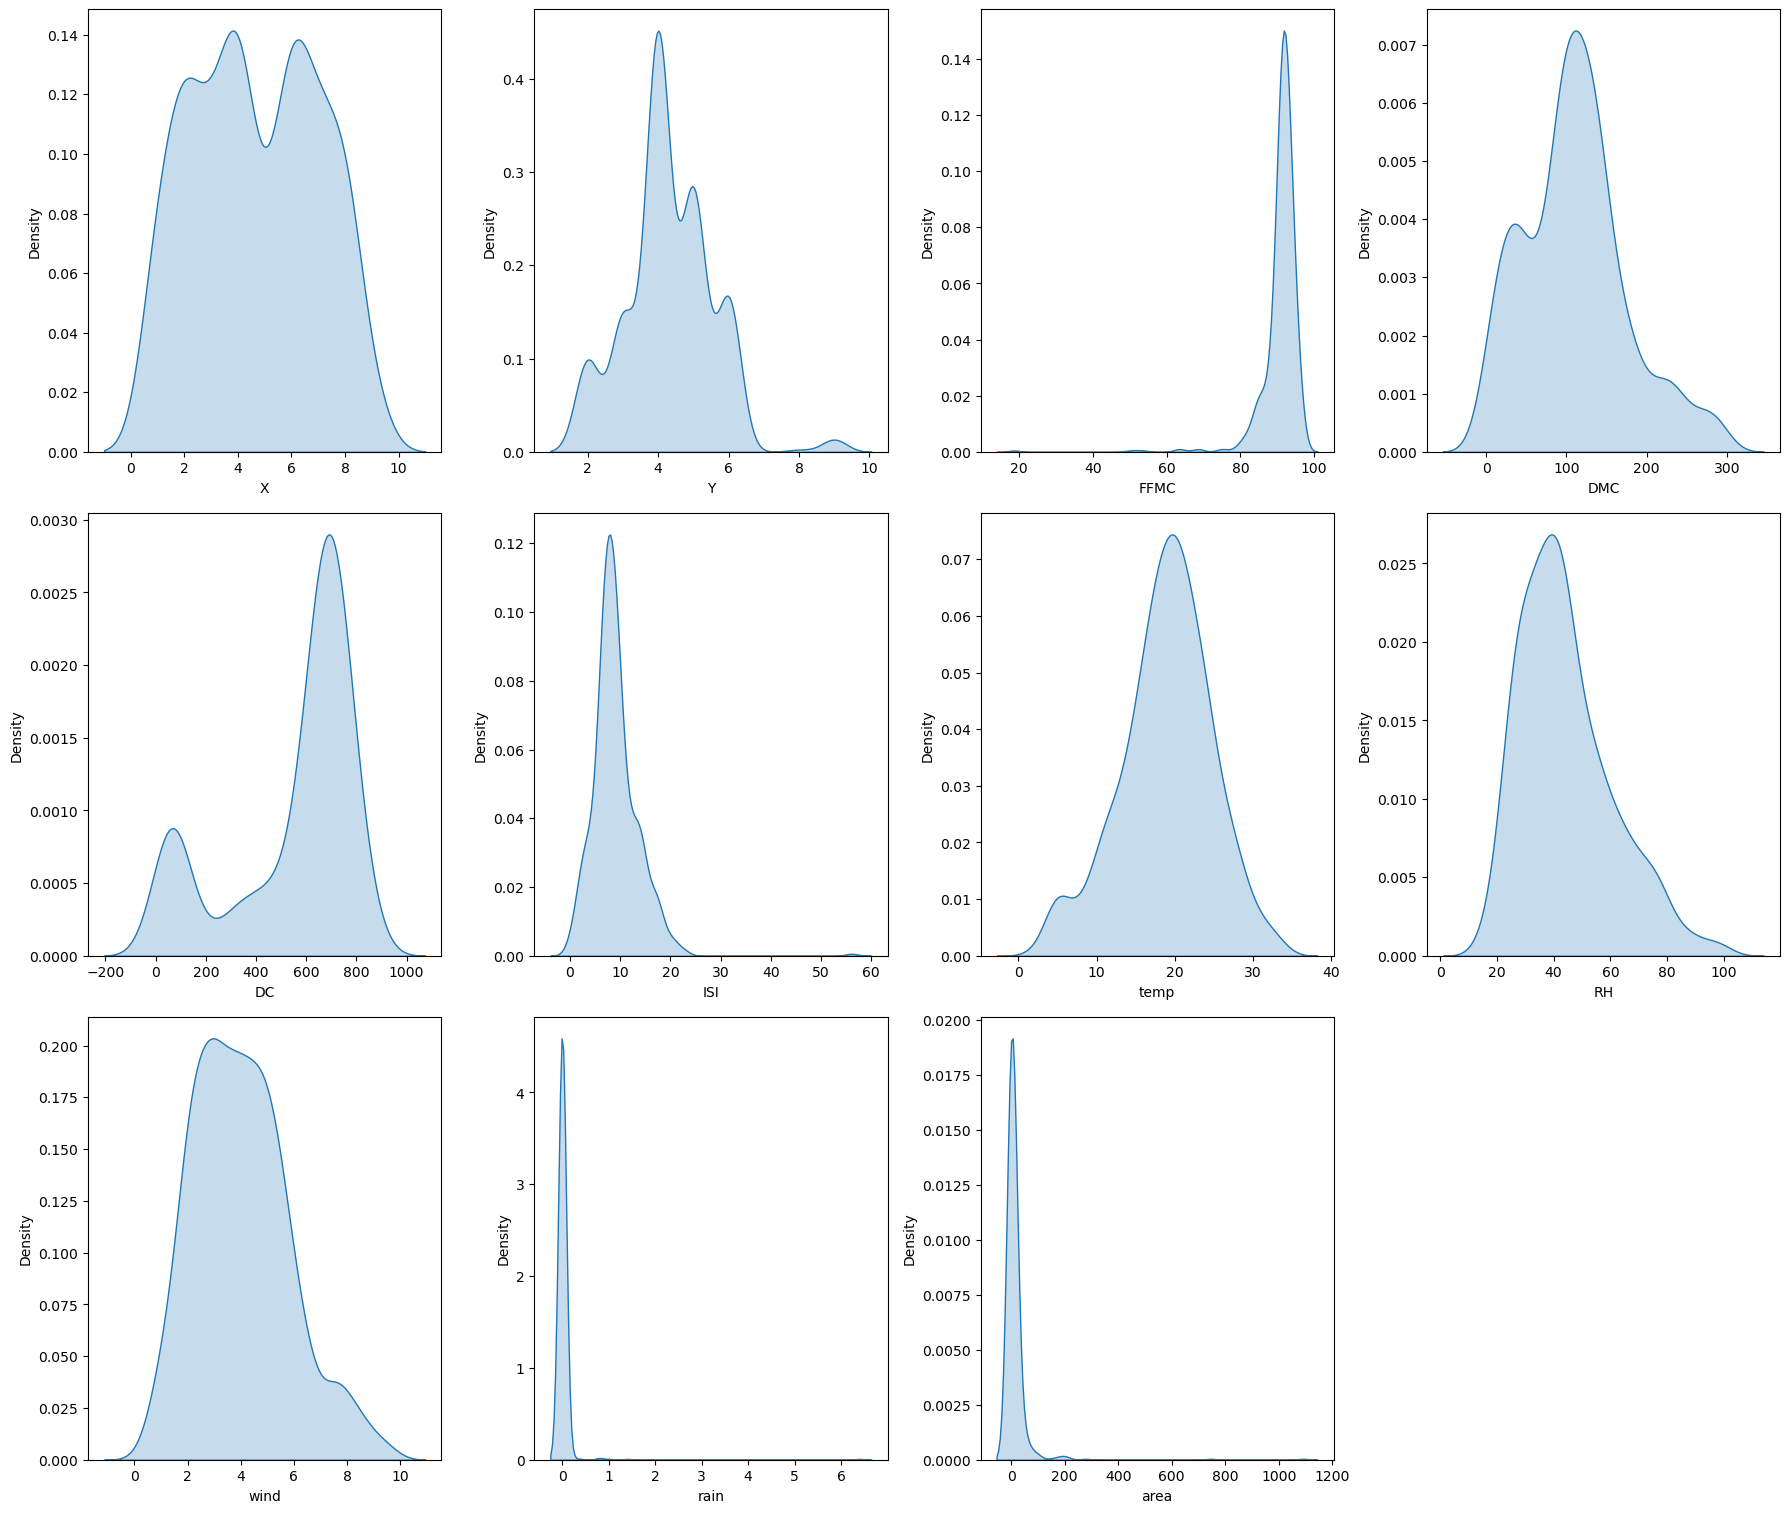

In [9]:
plt.figure(figsize = (18, 40))
index = 0
for col in numerical_cols:
    index += 1
    plt.subplot(8, 4, index)
    sns.kdeplot(df[col], fill = True)
plt.tight_layout()
plt.show()

Looking at the above plots, it seems that the data is not skewed. There is no Left skew of Right skew.
However, the rain, ISI and FFMC plots indicate that these columns have high Kurtosis meaning there are many outliers here.

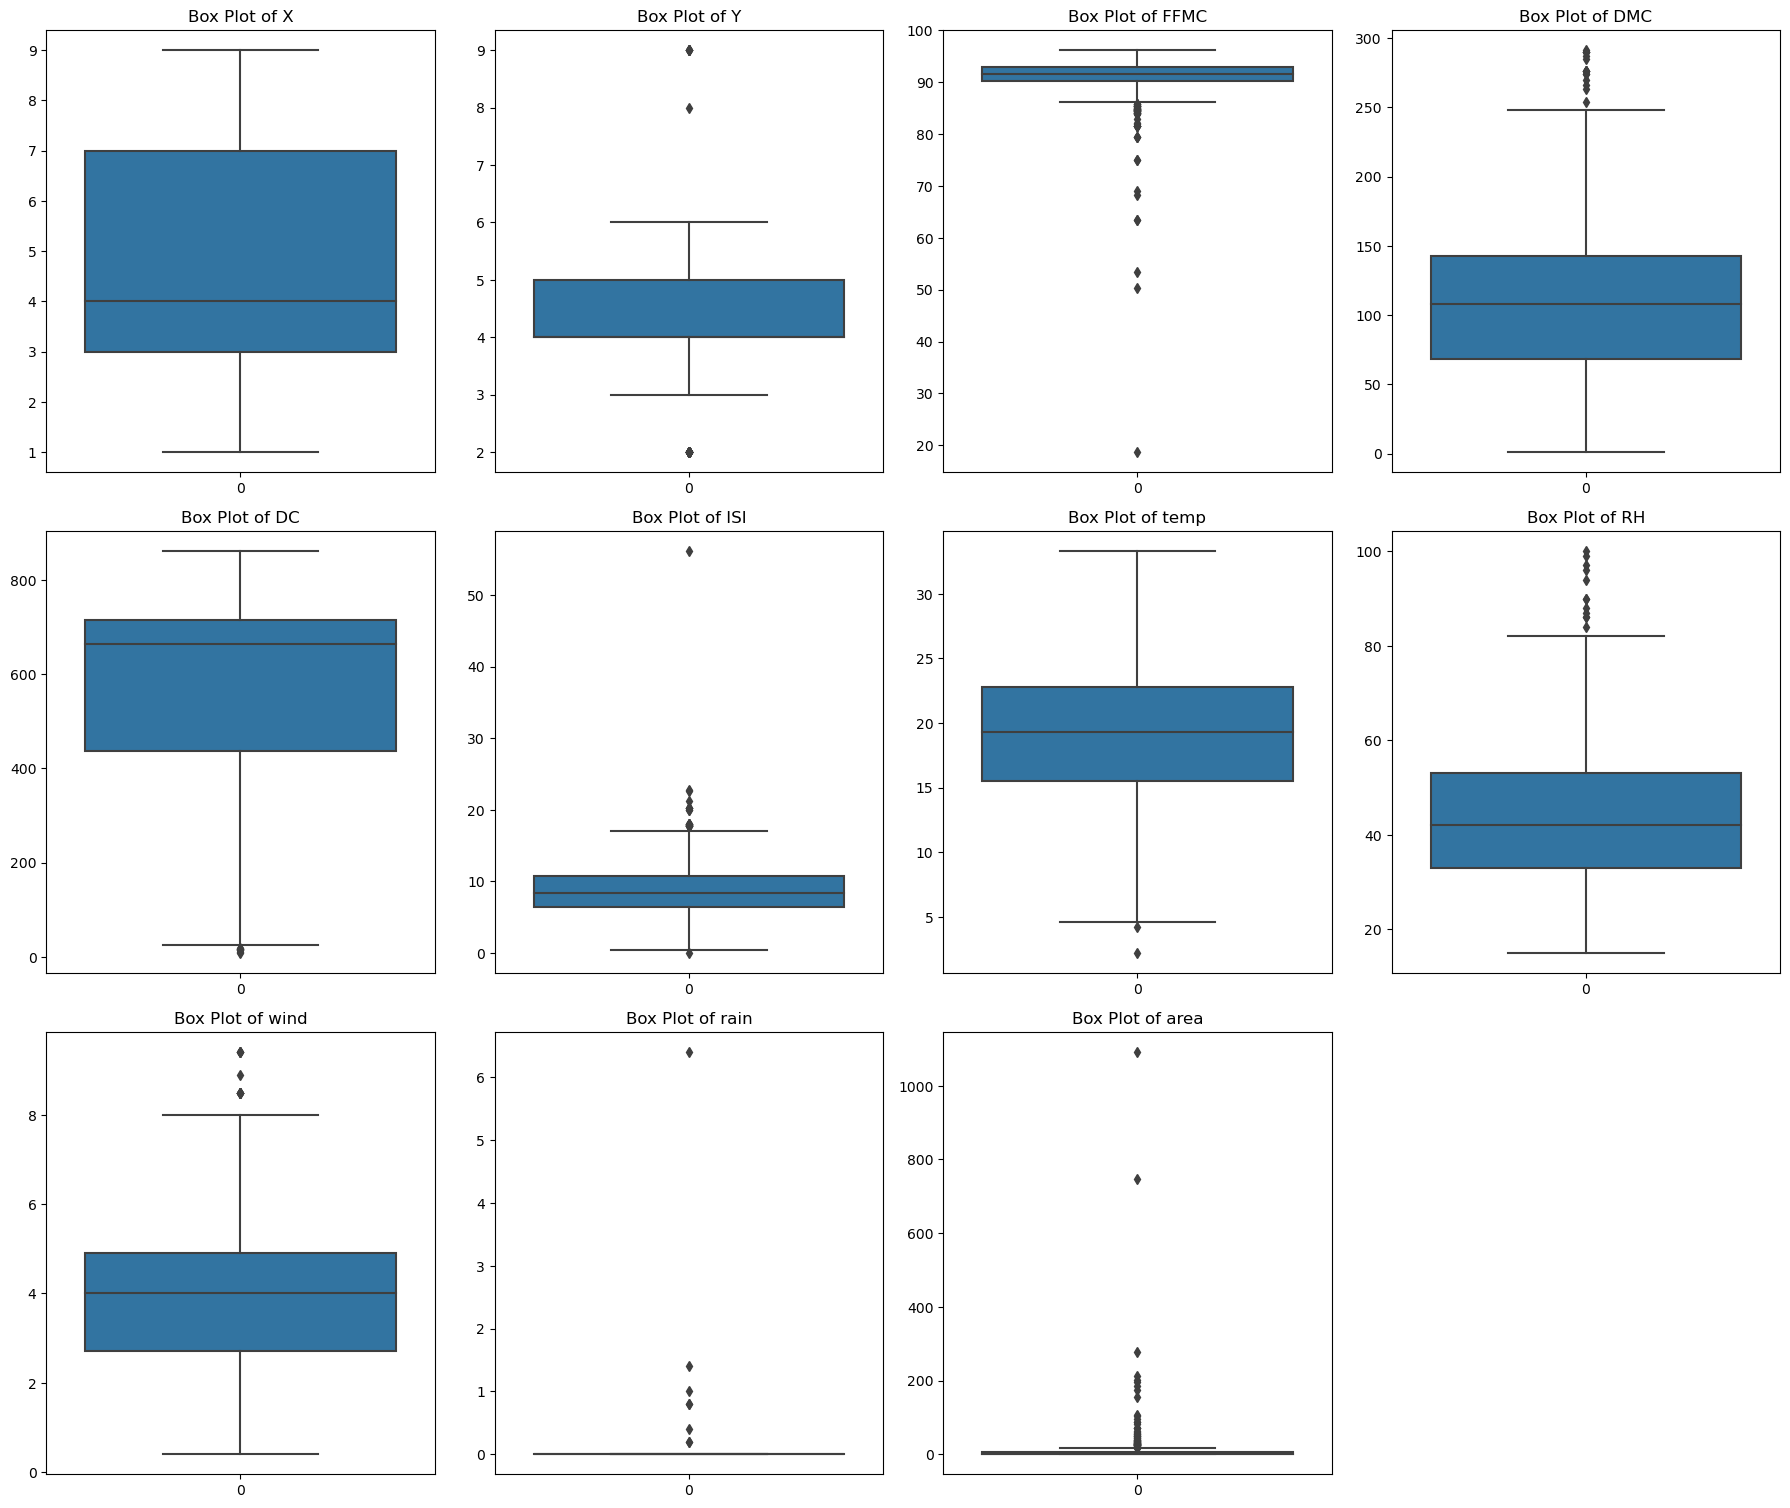

In [10]:
plt.figure(figsize = (18, 40))
index = 0
for col in numerical_cols:
    index += 1
    plt.subplot(8, 4, index)
    sns.boxplot(data = df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

There are many outliers in Rain, RH, ISI, FFMC, DMC. This means that these features have high Kurtosis. We need to transform these features to reduce the effects of the outliers.

Now we will analyze the categorical data.

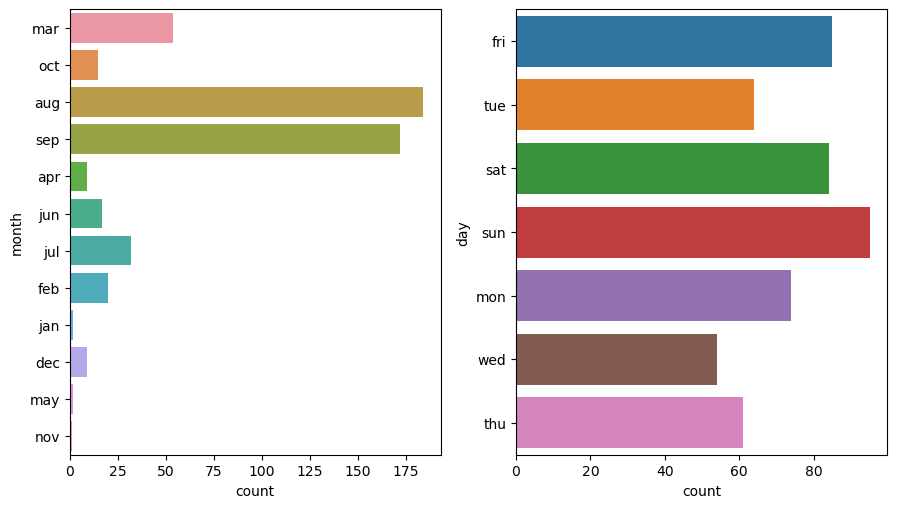

In [11]:
plt.figure(figsize = (18, 40))
index = 0
for col in categorical_cols:
    index += 1
    plt.subplot(8, 4, index)
    sns.countplot(data = df, y = col)
plt.tight_layout()
plt.show()

Most of the fires are in August and September.

Now, I want to find out the correlation amongst the columns. To do so, I will add the target(area) to the remaining numerical features and store this dataframe in the variable num_data.

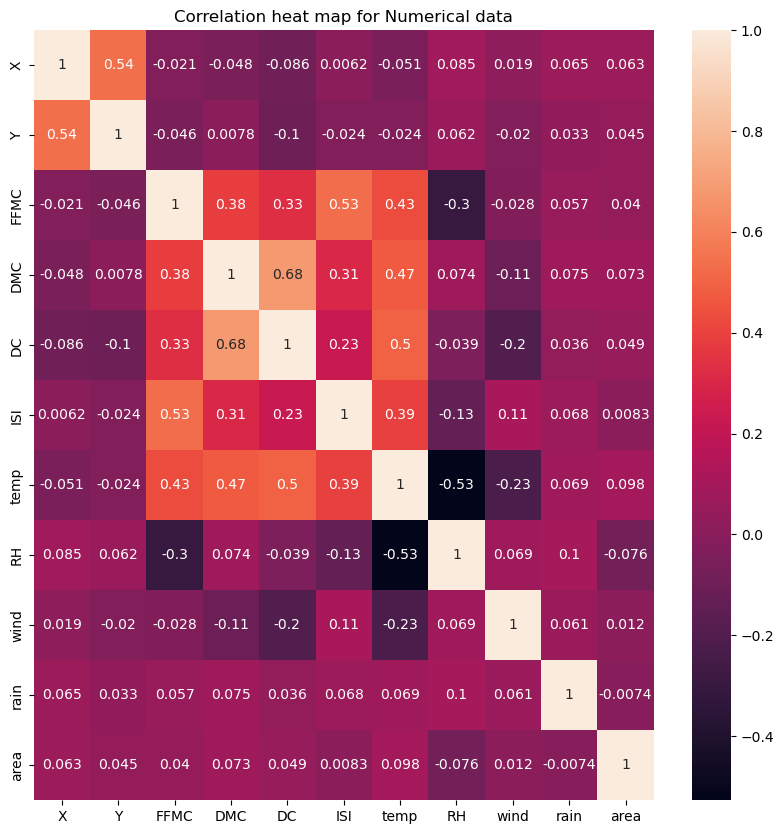

In [12]:
num_data = dataset.select_dtypes(exclude='object')
plt.figure(figsize = (10,10))
sns.heatmap(num_data.corr(), annot=True)
plt.title("Correlation heat map for Numerical data")
plt.show()

As we can see, the area feature has weak correlation with all other features.

# Transforming the features with many outliers

In [13]:
features_to_transform = ['rain','RH','ISI','area','FFMC','DC']

In [14]:
num_data_original = num_data
num_data_transformed = num_data[:]

In [15]:
for feature in features_to_transform:
#     num_data_transformed[feature] = np.log(1 + num_data_transformed[feature])
    np.log1p(num_data_transformed[feature])

Plotting graphs for Log transformed data

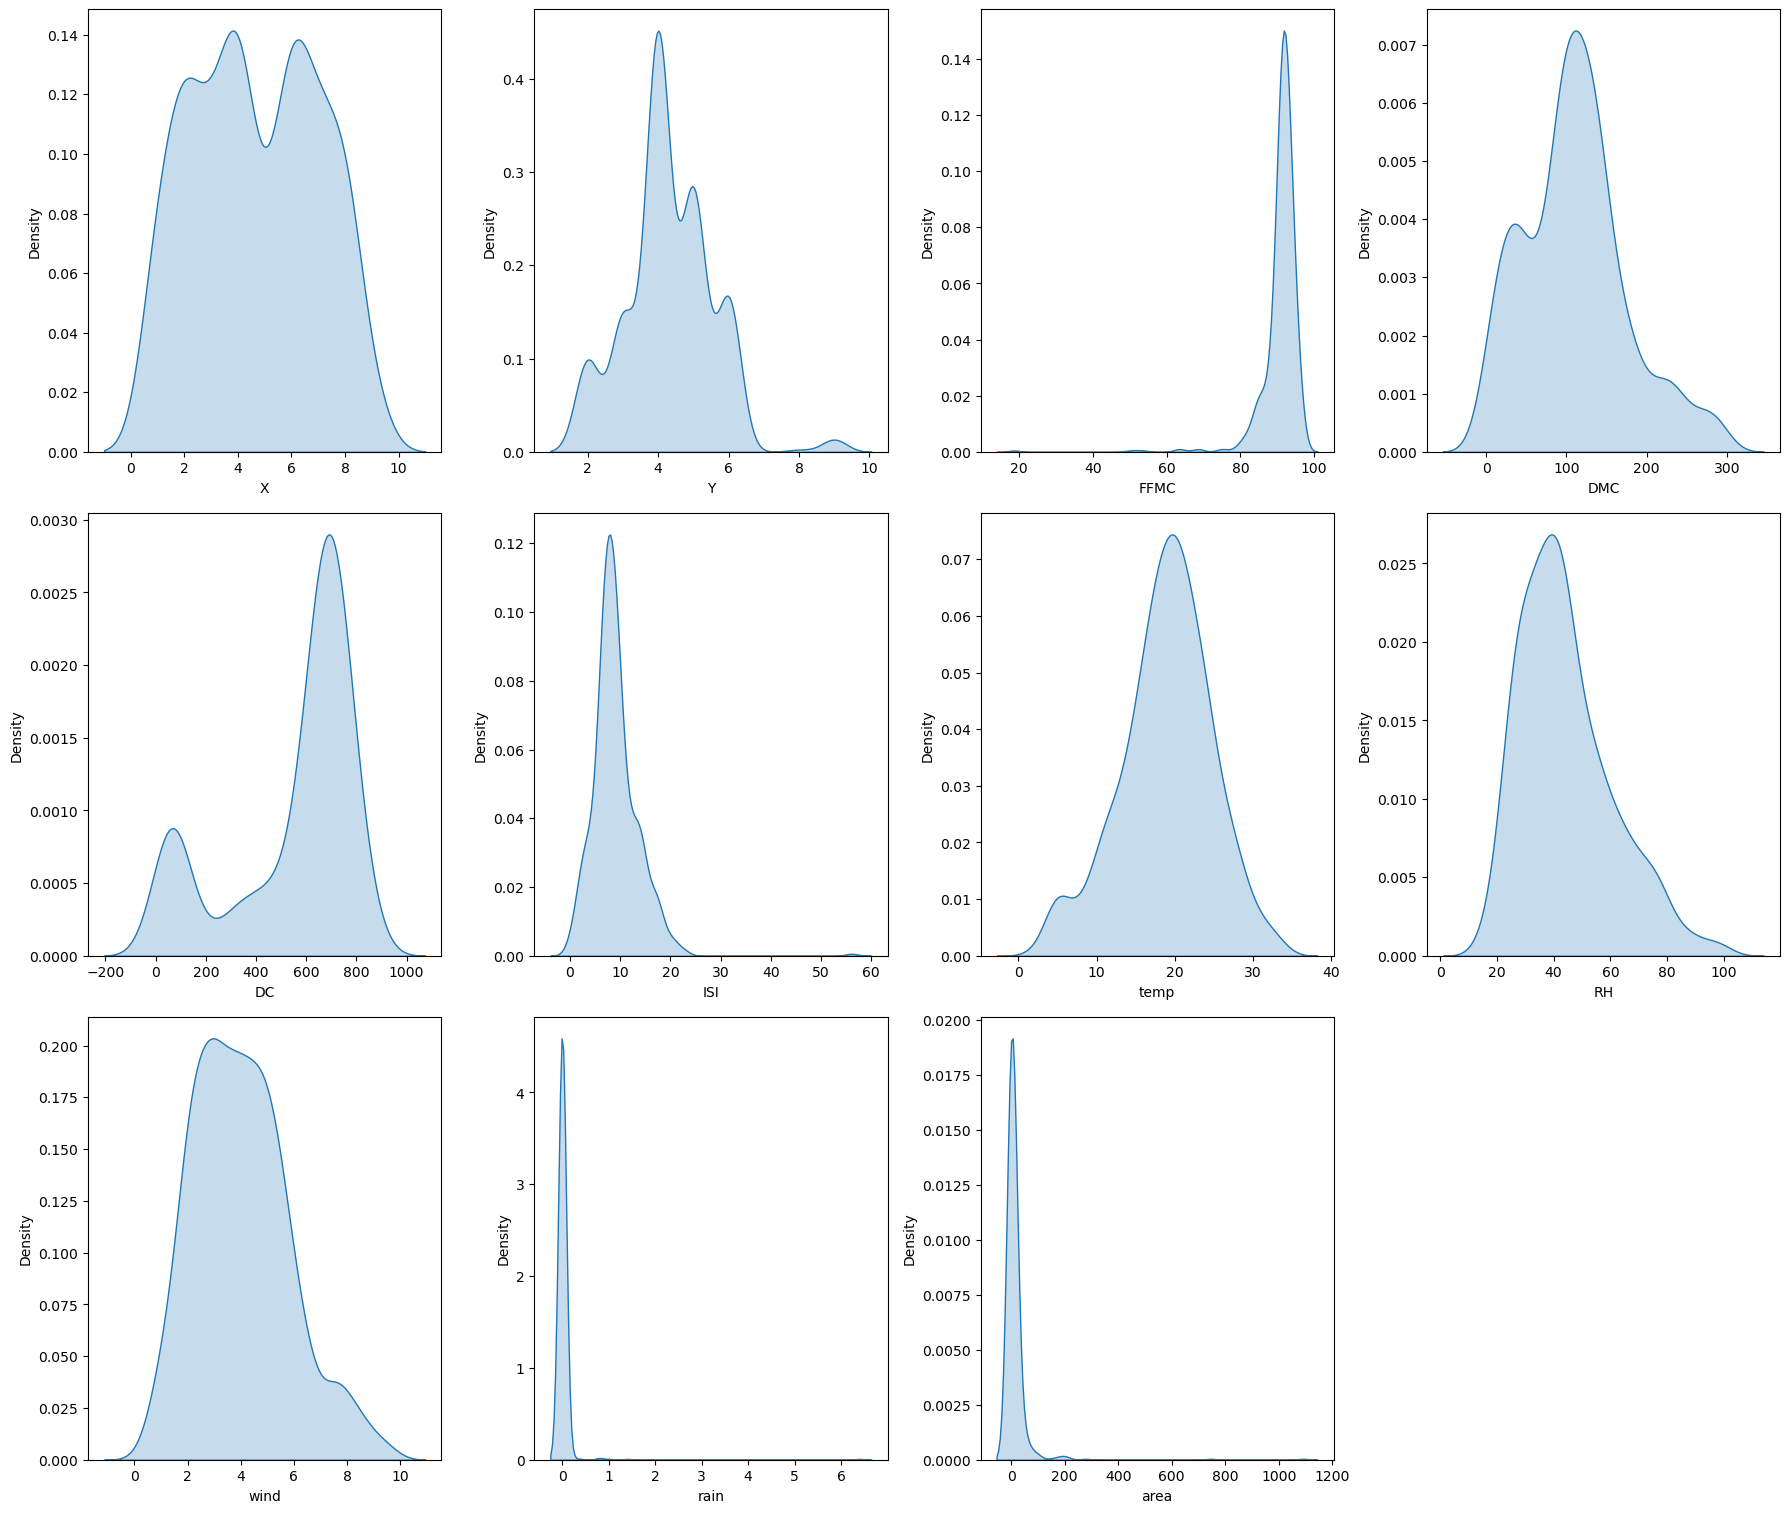

In [16]:
plt.figure(figsize = (18, 40))
index = 0
for col in numerical_cols:
    index += 1
    plt.subplot(8, 4, index)
    sns.kdeplot(num_data_transformed[col], fill = True)
plt.tight_layout()
plt.show()

PLotting Box and Whisper curve for the Log transformed data

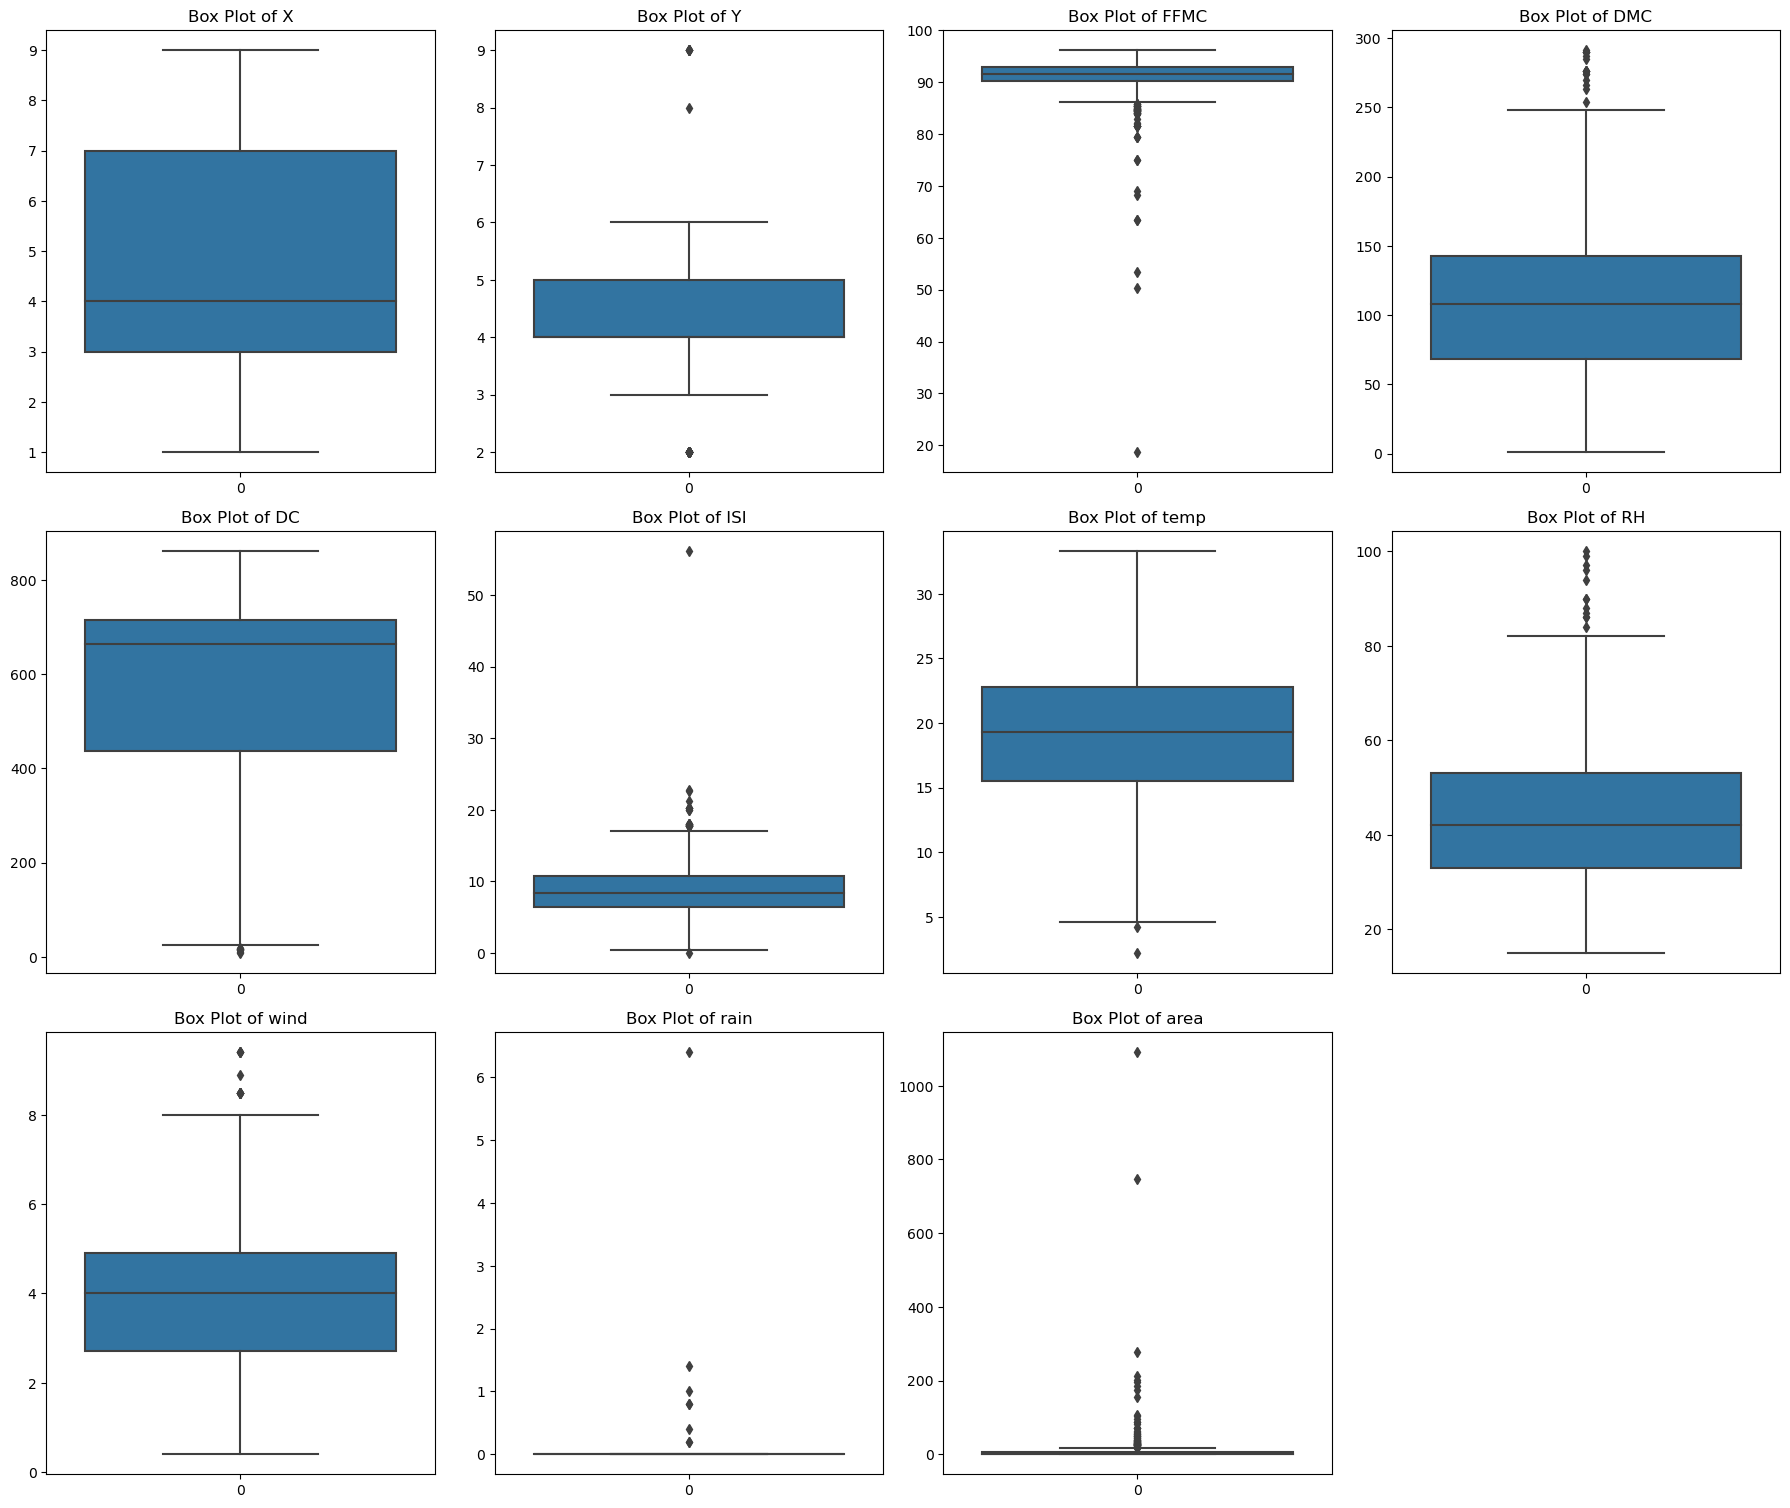

In [17]:
plt.figure(figsize = (18, 40))
index = 0
for col in numerical_cols:
    index += 1
    plt.subplot(8, 4, index)
    sns.boxplot(data = num_data_transformed[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Rain feature has only outliers so I will get rid of it later.

Log transform does not remove outliers. It reduces their effect. Let us assesss if that has been done or not.

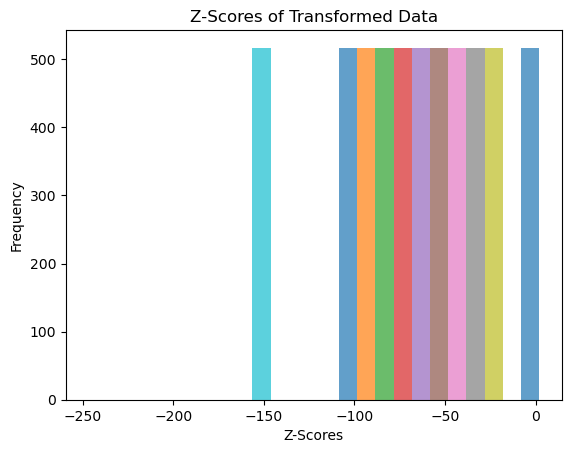

Extreme Outliers:      X  Y  FFMC    DMC     DC   ISI  temp    RH  wind  rain     area
0    7  5   NaN    NaN    NaN   5.1   8.2   NaN   6.7   0.0      NaN
1    7  4   NaN    NaN    NaN   6.7  18.0   NaN   0.9   0.0      NaN
2    7  4   NaN    NaN    NaN   6.7  14.6   NaN   1.3   0.0      NaN
3    8  6   NaN    NaN    NaN   9.0   8.3   NaN   4.0   0.2      NaN
4    8  6   NaN    NaN    NaN   9.6  11.4   NaN   1.8   0.0      NaN
5    8  6   NaN    NaN    NaN  14.7  22.2   NaN   5.4   0.0      NaN
6    8  6   NaN    NaN    NaN   8.5  24.1  27.0   3.1   0.0      NaN
7    8  6   NaN    NaN    NaN  10.7   8.0   NaN   2.2   0.0      NaN
8    8  6   NaN    NaN    NaN   7.0  13.1   NaN   5.4   0.0      NaN
9    7  5   NaN    NaN    NaN   7.1  22.8   NaN   4.0   0.0      NaN
10   7  5   NaN    NaN    NaN   7.1  17.8   NaN   7.2   0.0      NaN
11   7  5   NaN    NaN    NaN  22.6  19.3   NaN   4.0   0.0      NaN
12   6  5   NaN    NaN    NaN   0.8  17.0   NaN   6.7   0.0      NaN
13   6  5   NaN 

In [18]:
mean_original = np.mean(num_data_original)
std_original = np.std(num_data_original)
z_scores_original = (num_data_original - mean_original)/std_original

mean_transformed = np.mean(num_data_transformed)
std_transformed = np.std(num_data_transformed)
z_scores_transformed = (num_data_transformed - mean_transformed) / std_transformed


extreme_outliers_original = num_data_original[np.abs(z_scores_original) > 3]
extreme_outliers_transformed = num_data_transformed[np.abs(z_scores_transformed) > 3]

# Visualize Z-scores
plt.hist(z_scores_transformed, bins=2, alpha=0.7)
plt.title('Z-Scores of Transformed Data')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.show()

print("Extreme Outliers:", extreme_outliers_transformed)
print("Z-Scores:", z_scores_transformed)


The Z score histogram is rectangular indicating that the outlier efect has reduced.

In [19]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


# Data Preparartion

One Hot Encode the data

In [20]:
one_hot_encoded_data = pd.DataFrame()
for col in categorical_cols:
    encoded_col = pd.get_dummies(df[col], dtype=int)
    one_hot_encoded_data = pd.concat([one_hot_encoded_data, encoded_col], axis = 1)
one_hot_encoded_data.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [21]:
transformed_data = pd.concat([df, one_hot_encoded_data], axis = 1)
transformed_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [22]:
transformed_data = transformed_data.drop(['month', 'day','rain'], axis=1)
transformed_data.head()
features_to_transform.remove('rain')

Moving the area column(target) to the last

In [23]:
target_col = transformed_data['area']
transformed_data = transformed_data.drop(columns = ['area'])
transformed_data = pd.concat([transformed_data, target_col], axis = 1)
transformed_data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0


In [24]:
# def log_transform(dataframe, features):
#     for feature in features:
#         dataframe[feature] = np.log(1 + dataframe[feature])
#     return dataframe

Splitting into Training and Test data.

-> Splitting the data frame into X(independant features) and y(dependant / target features).

In [25]:
X = transformed_data.drop(columns = ['area'])
y = transformed_data['area']
features_to_transform.remove('area')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [27]:
X_train.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
329,4,3,92.2,102.3,751.5,8.4,23.5,27,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
173,4,4,90.9,126.5,686.5,7.0,17.7,39,2.2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
272,2,5,92.1,152.6,658.2,14.3,20.2,47,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
497,3,4,96.1,181.1,671.2,14.3,32.3,27,2.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
182,5,4,86.8,15.6,48.3,3.9,12.4,53,2.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
numerical_cols =['FFMC','DMC','DC','ISI','temp','RH','wind']

# Log transform numerical columns
X_train[numerical_cols] = X_train[numerical_cols].apply(lambda x: np.log1p(x))

In [29]:
X_train.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
329,4,3,4.534748,4.637637,6.623401,2.240710,3.198673,3.332205,1.609438,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
173,4,4,4.520701,4.848116,6.533062,2.079442,2.928524,3.688879,1.163151,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
272,2,5,4.533674,5.034352,6.491027,2.727853,3.054001,3.871201,1.609438,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
497,3,4,4.575741,5.204556,6.510556,2.727853,3.505557,3.332205,1.163151,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
182,5,4,4.475062,2.809403,3.897924,1.589235,2.595255,3.988984,1.163151,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


After having trained the model previously, it is underfitting so I will try to remove some features like X and Y

In [30]:
X_train.shape

(413, 28)

In [31]:
X_test.shape

(104, 28)

# Building Machine Learning models and Training them

In [32]:
linear_regression_model = LinearRegression()

In [33]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

Now that the model is trained, we need to check for Underfitting and Overfitting.

To check Underfitting, first predict the values for TRAINED DATA then calculate the reverse log.
To check Overfitting, predict the values for TEST DATA then calculate the reverse log.

Calculate the Mean Square Errors on the reverse logs.

Then, comapre the 2 errors.

In [34]:
y_train_pred = linear_regression_model.predict(X_train)
y_test_pred = linear_regression_model.predict(X_test)

y_train_pred_rev_log = np.expm1(y_train_pred)
y_test_pred_rev_log = np.expm1(y_test_pred)

train_error = mean_squared_error(y_train, y_train_pred_rev_log)
test_error = mean_squared_error(y_test, y_test_pred_rev_log)

print("Training Error (MSE) : ", train_error)
print("Test Error (MSE) : ", test_error)

Training Error (MSE) :  6.28415737726867e+32
Test Error (MSE) :  12214.53415384615


In [35]:
y_test_pred

array([ -2185.18886955,  -7396.2575143 ,  -6634.75974705,  -9384.40838782,
        -8157.58418739,  -1234.69212309,  -1451.37876922,  -9245.22550912,
        -9745.1004782 ,  -6625.54808516,  -8630.06624584,  -9883.33154492,
        -5656.42141172,  -8334.37410932,  -9402.40698652, -10529.8091514 ,
        -6726.82410476,  -9194.96448371,  -6790.00242631,  -6790.83974196,
        -1341.16768493,  -9176.52300047,  -5277.91672007,  -8291.72459515,
        -9407.89329857,  -7451.05218137,  -1097.31315913,  -6719.72998117,
       -10132.876282  , -10301.01162556,  -7825.26310516,  -9976.80489339,
        -8431.69673171,  -9309.41145622,  -1170.52207689,  -4085.38274669,
        -7170.51790937,  -8617.33100269,  -7022.76388915,  -8170.34724925,
        -6520.84952807,  -8300.87511821,  -8347.70033096,  -8387.92922922,
        -6662.95905272,  -3533.40590831,  -1559.80947808,   -800.31575648,
        -9681.64052608,  -5065.90125144,  -8226.51286062,  -8238.4733508 ,
        -6947.72247281,  

In [36]:
y_test_pred_rev_log

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

NEURAL NETWORK (MULTI-LEVEL PERCEPTRON)

In [45]:
neural_network_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation = 'relu', solver = 'adam', max_iter=1000, random_state=42)
neural_network_model.fit(X_train, y_train)

 # Make predictions on training and test data
y_train_pred = neural_network_model.predict(X_train)
y_test_pred = neural_network_model.predict(X_test)

# Calculate mean squared error for training and test data
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print("Training Error (MSE) : ", train_error)
print("Test Error (MSE) : ", test_error)

Training Error (MSE) :  1992.7718800457835
Test Error (MSE) :  88153.68801648948


In [38]:
predictions = np.expm1(y_test_pred)
predictions

array([ 3.75535930e+000,  5.50922353e+170,  9.89627767e+186,
        1.51287154e+126,  8.81233017e+153,  8.30690367e+004,
        9.25913168e+023,  1.05141034e+112,  2.16373761e+141,
        2.21560932e+098,  3.32516339e+169,  1.25976849e+139,
        3.26694178e+113,  4.61393671e+132,  5.66431105e+129,
        8.34154950e+116,  7.97028377e+109,  5.09699222e+129,
        1.38025067e+142,  7.74725254e+137,  9.63473692e+027,
        9.74255992e+129,  1.17313478e+055,  6.78249191e+140,
        1.87433589e+124,  9.96856835e+162, -9.99657758e-001,
        4.73254832e+196,  6.16417773e+161,  1.14820271e+165,
        1.97417602e+168,  4.35715558e+160,  6.88283305e+143,
        4.38051724e+130,  5.83624517e+013,  2.60884209e+058,
        4.26961922e+143,  1.25788363e+160,  3.76767336e+146,
        2.89348142e+123,  5.19778701e+175,  3.14694143e+137,
        2.55987185e+134,  1.01518402e+153,  3.79865960e+185,
        9.47626185e+127,  1.56205625e+019, -9.99999969e-001,
        8.76347893e+138,